In [3]:
'''import sys
!conda install --yes --prefix {sys.prefix} urllib2'''

In [4]:
import pandas as pd
import csv
import urllib.request as ur

# Loading and setting data columns

In [63]:
data = pd.read_csv('cost-of-living.csv')
data.shape, data.columns

((55, 161),
 Index(['Unnamed: 0', 'Saint Petersburg, Russia', 'Istanbul, Turkey',
        'Izmir, Turkey', 'Helsinki, Finland', 'Chisinau, Moldova',
        'Milan, Italy', 'Cairo, Egypt', 'Banja Luka, Bosnia And Herzegovina',
        'Baku, Azerbaijan',
        ...
        'Lviv, Ukraine', 'Novosibirsk, Russia', 'Bursa, Turkey',
        'Brussels, Belgium', 'Jerusalem, Israel', 'Melbourne, Australia',
        'Perth, Australia', 'Sydney, Australia', 'Alexandria, Egypt',
        'Quito, Ecuador'],
       dtype='object', length=161))

In [65]:
# changing the 1st column name from "unnamed 0:" to "respective_costs"
cols = data.columns.values
cols[0] = 'respective_costs'
data.columns = cols
data.columns

Index(['respective_costs', 'Saint Petersburg, Russia', 'Istanbul, Turkey',
       'Izmir, Turkey', 'Helsinki, Finland', 'Chisinau, Moldova',
       'Milan, Italy', 'Cairo, Egypt', 'Banja Luka, Bosnia And Herzegovina',
       'Baku, Azerbaijan',
       ...
       'Lviv, Ukraine', 'Novosibirsk, Russia', 'Bursa, Turkey',
       'Brussels, Belgium', 'Jerusalem, Israel', 'Melbourne, Australia',
       'Perth, Australia', 'Sydney, Australia', 'Alexandria, Egypt',
       'Quito, Ecuador'],
      dtype='object', length=161)

In [66]:
# transposing the data to get features as columns
tpose = data.transpose()
tpose.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
respective_costs,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641


In [67]:
# converting column names from numbers to values in the first row and then delete the first row
tcols = tpose.iloc[0, :]
tpose.columns = tcols

feature_data = tpose.drop(['respective_costs'], axis=0)
feature_data.head()

respective_costs,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3


# Statistical Analysis of data

In [81]:
# using the data - AFTER TRANSPOSE
import os
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
from pylab import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

print("In bytes: ", os.path.getsize("cost-of-living.csv"), "bytes")
print("In kilo-bytes: ", os.path.getsize("cost-of-living.csv") / 1000, "KB")

In bytes:  54993 bytes
In kilo-bytes:  54.993 KB


In [93]:
feature_data.columns

Index(['Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
      

Displaying a scatter and distance plots of each feature in the data by plots


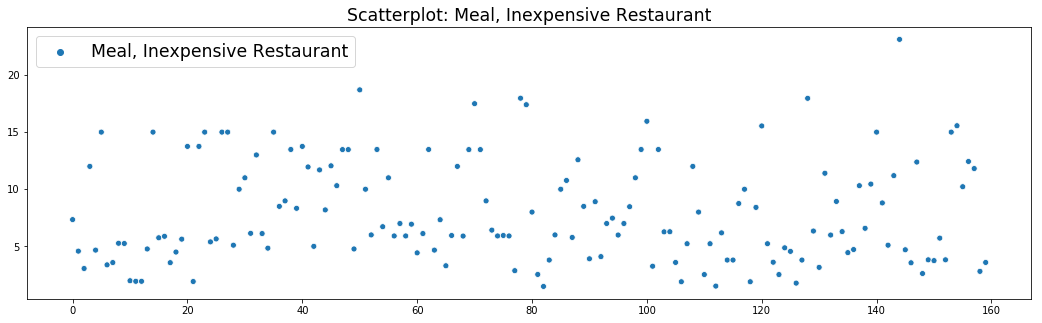

Distance Plot  0 :  Meal, Inexpensive Restaurant


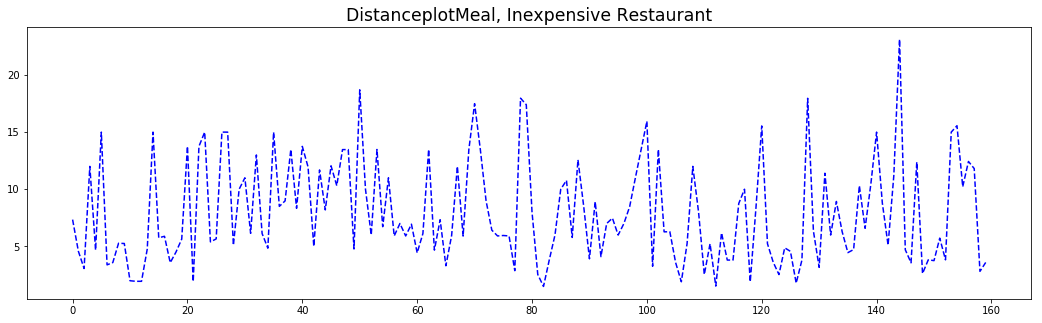

*******************************************************



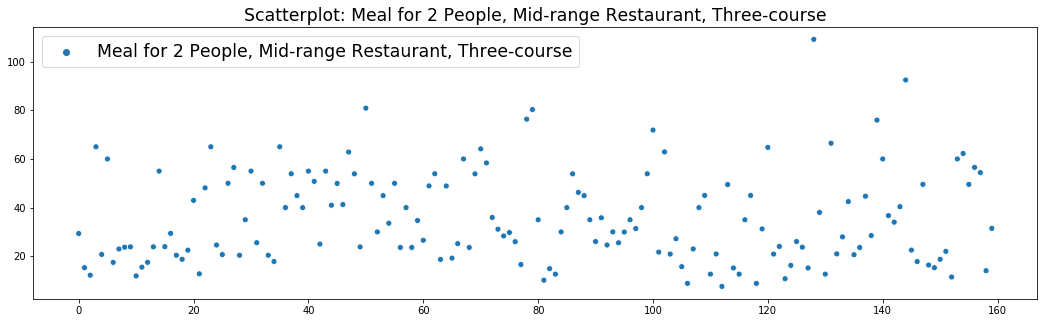

Distance Plot  1 :  Meal for 2 People, Mid-range Restaurant, Three-course


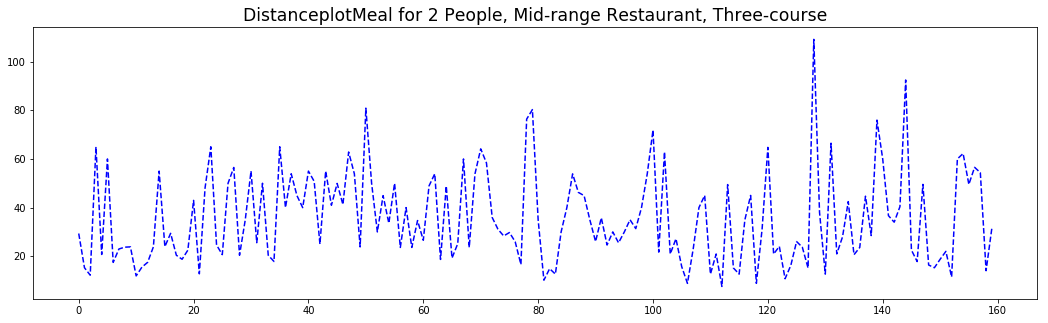

*******************************************************



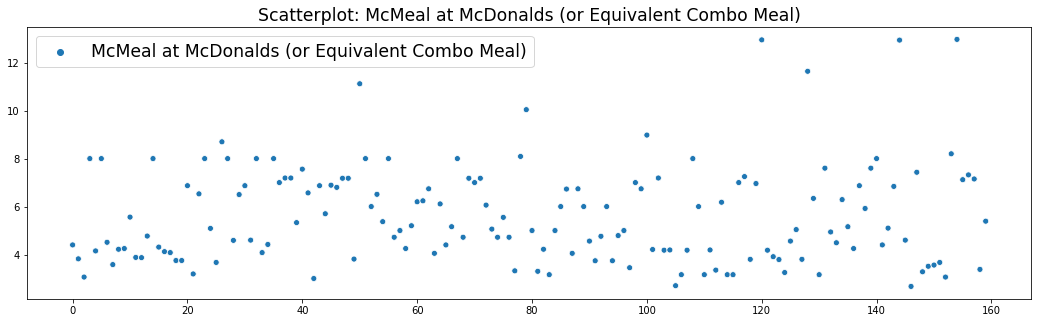

Distance Plot  2 :  McMeal at McDonalds (or Equivalent Combo Meal)


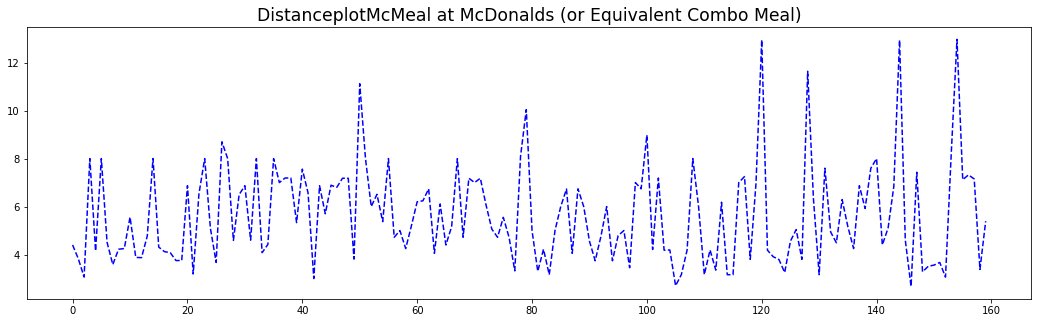

*******************************************************



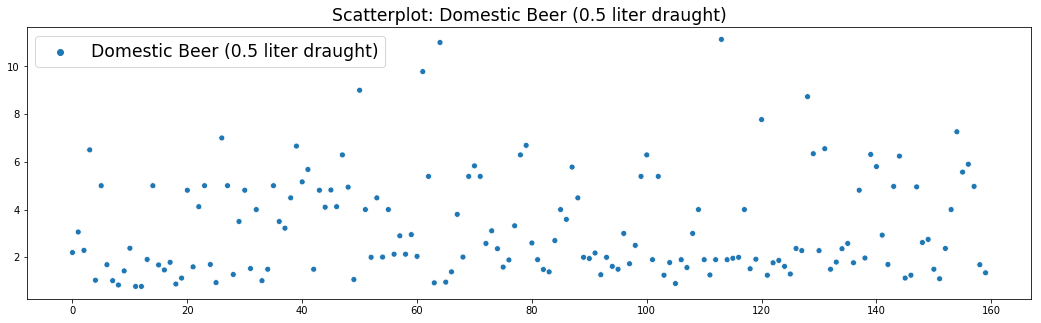

Distance Plot  3 :  Domestic Beer (0.5 liter draught)


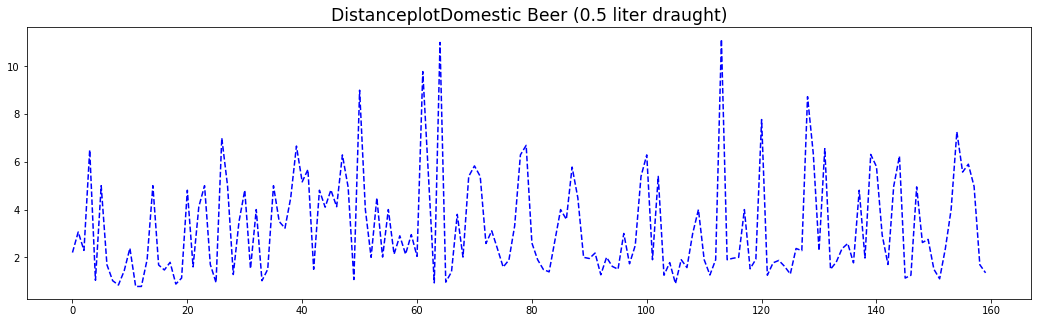

*******************************************************



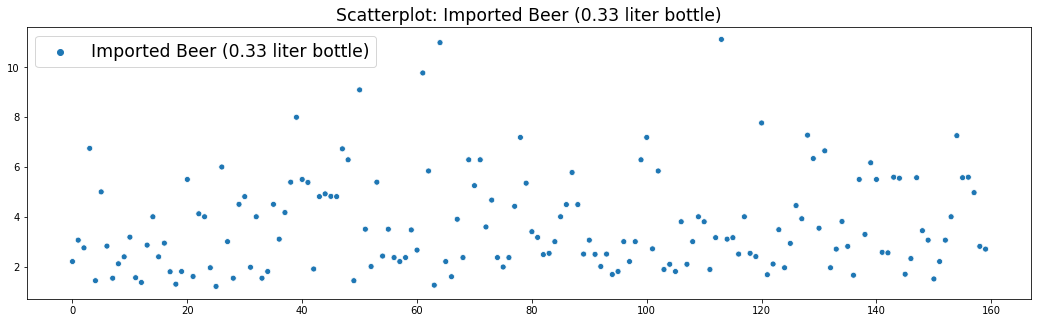

Distance Plot  4 :  Imported Beer (0.33 liter bottle)


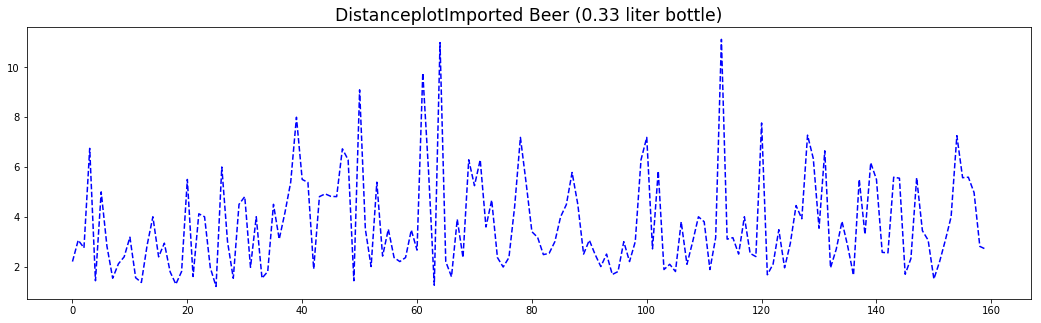

*******************************************************



In [164]:
# examining each features by plotting them
# get all the columns
all_cols = feature_data.columns.values
print("Displaying a scatter and distance plots of each feature in the data by plots")

# iterate over the first 5 features of the data
for i in range(5):
    
    # convert each feature to array and form a new dataframe to remove the index
    to_arr = np.array(feature_data.iloc[:, i])
    cur_feature = pd.DataFrame({all_cols[i]: to_arr})
    
    # apply a scatter plot over the feature
    plt.figure(figsize=(18,5))
    sns.scatterplot(data=cur_feature)
    plt.legend(fontsize='xx-large')
    feature_title = 'Scatterplot: ' + all_cols[i]
    plt.title(feature_title, fontsize='xx-large')
    plt.show()
    
    # apply a distance plot over the feature
    print("Distance Plot ", i, ": ", all_cols[i])
    plt.figure(figsize=(18,5))
    plt.plot(cur_feature.index, cur_feature, 'b--')
    feature_title = 'Distanceplot' + all_cols[i]
    plt.title(feature_title, fontsize='xx-large')
    plt.show()
    
    print("*******************************************************\n")

In [165]:
# basic statistical summary

print("Summary statistics:\n")

# examining the statistics of the first 5 features
for i in range(5):
    print("Statistics of - ", all_cols[i])
    to_arr = np.array(feature_data.iloc[:, i])
    medi = median(to_arr)
    print("Median: ", medi)
    
    print(feature_data.iloc[:, i].describe(), "\n")
    
    # Standard Deviation
    std = sqrt(np.var(to_arr))
    print("Standard deviation: ", std)
    
    print('The first four calculated moments of a normal distribution: ')
    # Mean
    mean = to_arr.mean()
    print('Mean: ', mean)

    # Variance
    var = np.var(to_arr)
    print('Variance: ', var)

    # Return unbiased skew normalized by N-1
    skew = feature_data[all_cols[i]].skew()
    print('Skewness: ', skew)

    # Return unbiased kurtosis over requested axis using Fisher’s definition of kurtosis 
    # (kurtosis of normal == 0.0) normalized by N-1
    kurt = feature_data[all_cols[i]].kurtosis()
    print('Kurtosis: ', kurt)
    print("************************************************\n\n")

Summary statistics:

Statistics of -  Meal, Inexpensive Restaurant
Median:  6.285
count     160.0
unique    111.0
top        15.0
freq        8.0
Name: Meal, Inexpensive Restaurant, dtype: float64 

Standard deviation:  4.460580703769831
The first four calculated moments of a normal distribution: 
Mean:  7.967187499999997
Variance:  19.89678021484376
Skewness:  0.7268710944948107
Kurtosis:  -0.1904085576868053
************************************************


Statistics of -  Meal for 2 People, Mid-range Restaurant, Three-course
Median:  30.555
count     160.0
unique    116.0
top        40.0
freq        5.0
Name: Meal for 2 People, Mid-range Restaurant, Three-course, dtype: float64 

Standard deviation:  18.819565400385176
The first four calculated moments of a normal distribution: 
Mean:  35.76862499999998
Variance:  354.1760418593749
Skewness:  0.8790284278947901
Kurtosis:  0.6898308655170591
************************************************


Statistics of -  McMeal at McDonalds (or

In [166]:
# difference noted between describe function of the original data and the transposed data
feature_data.describe()

respective_costs,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
count,160.0,160.0,160.0,160.0,160.0,160.00,160.00,160.0,160.00,160.00,...,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00
unique,111.0,116.0,102.0,107.0,103.0,121.00,107.00,87.0,116.00,117.00,...,103.00,128.00,109.00,124.00,92.00,99.00,148.00,160.00,160.00,160.00
top,15.0,40.0,8.0,4.0,4.0,0.39,1.59,0.7,0.43,0.78,...,0.57,2.63,1.05,1.02,1.13,0.48,5.65,18687.14,255.31,3114.28
freq,8.0,5.0,12.0,7.0,7.0,4.00,5.00,6.0,5.00,3.00,...,4.00,4.00,6.00,3.00,7.00,4.00,3.00,1.00,1.00,1.00


In [136]:
data.describe()

,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,947.569636,1030.352000,973.539818,1235.551636,726.469091,1400.266909,939.282727,712.967455,800.866182,717.254182,...,876.614545,793.913091,921.488182,1344.416364,1703.642545,1173.578182,1059.191273,1256.769818,928.888000,1067.515636
std,3689.965894,4357.787422,4320.550584,4477.879943,3173.541506,4600.941958,4371.550743,3146.635068,3295.012186,3038.846698,...,3873.193779,3427.781972,4158.043792,4608.688084,6586.478694,3435.494486,3334.744925,3493.282897,4406.118669,4490.334519
min,0.030000,0.110000,0.090000,0.070000,0.070000,0.180000,0.010000,0.100000,0.030000,0.060000,...,0.030000,0.030000,0.120000,0.230000,0.130000,0.120000,0.320000,0.380000,0.010000,0.110000
25%,0.950000,0.855000,0.750000,2.180000,0.955000,1.995000,0.580000,0.930000,0.830000,1.025000,...,1.075000,0.975000,0.810000,2.070000,1.900000,2.400000,2.275000,2.430000,0.585000,1.330000
50%,4.400000,3.820000,3.060000,8.000000,3.610000,8.000000,3.380000,3.580000,3.540000,4.250000,...,3.600000,4.400000,3.060000,8.200000,10.370000,7.120000,7.320000,7.680000,3.380000,5.390000
75%,73.370000,43.365000,37.700000,82.575000,71.395000,86.485000,43.350000,68.605000,43.120000,35.250000,...,72.720000,73.910000,38.110000,75.620000,92.750000,79.930000,80.330000,90.720000,36.410000,49.155000
max,19305.290000,24443.150000,24443.150000,24402.770000,17238.130000,23233.330000,25098.600000,16859.680000,18564.590000,16535.220000,...,20706.610000,18196.160000,22948.670000,21788.330000,34921.490000,15479.870000,16149.980000,15845.500000,23626.730000,25324.920000


In [167]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Saint Petersburg, Russia to Quito, Ecuador
Data columns (total 55 columns):
Meal, Inexpensive Restaurant                                                  160 non-null object
Meal for 2 People, Mid-range Restaurant, Three-course                         160 non-null object
McMeal at McDonalds (or Equivalent Combo Meal)                                160 non-null object
Domestic Beer (0.5 liter draught)                                             160 non-null object
Imported Beer (0.33 liter bottle)                                             160 non-null object
Coke/Pepsi (0.33 liter bottle)                                                160 non-null object
Water (0.33 liter bottle)                                                     160 non-null object
Milk (regular), (1 liter)                                                     160 non-null object
Loaf of Fresh White Bread (500g)                                              160 

In [169]:
data.corr()

,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
"Saint Petersburg, Russia",1.000000,0.994591,0.992885,0.974678,0.994256,0.978407,0.986334,0.989404,0.994240,0.995817,...,0.992920,0.993897,0.992960,0.931602,0.989569,0.918586,0.950830,0.907843,0.987507,0.995093
"Istanbul, Turkey",0.994591,1.000000,0.998096,0.952730,0.989128,0.964077,0.991457,0.984674,0.985827,0.994348,...,0.990246,0.989795,0.995722,0.929162,0.976233,0.906851,0.946219,0.890543,0.986314,0.987005
"Izmir, Turkey",0.992885,0.998096,1.000000,0.957592,0.993289,0.952577,0.997541,0.991896,0.982589,0.997639,...,0.995497,0.994748,0.999179,0.905866,0.980290,0.882891,0.926335,0.867759,0.993682,0.986317
"Helsinki, Finland",0.974678,0.952730,0.957592,1.000000,0.972899,0.962191,0.959737,0.978581,0.960472,0.972428,...,0.972737,0.975903,0.961572,0.861826,0.995373,0.880925,0.902077,0.890961,0.967460,0.965490
"Chisinau, Moldova",0.994256,0.989128,0.993289,0.972899,1.000000,0.953016,0.992496,0.997321,0.990848,0.998019,...,0.999128,0.999303,0.996688,0.895879,0.988682,0.872939,0.914602,0.859678,0.997705,0.995356
"Milan, Italy",0.978407,0.964077,0.952577,0.962191,0.953016,1.000000,0.936639,0.944571,0.971223,0.957245,...,0.949135,0.952483,0.948853,0.959851,0.967628,0.971561,0.981194,0.971359,0.936092,0.965330
"Cairo, Egypt",0.986334,0.991457,0.997541,0.959737,0.992496,0.936639,1.000000,0.995232,0.972868,0.996589,...,0.996401,0.995348,0.998057,0.874536,0.981084,0.853151,0.900232,0.840817,0.996751,0.979425
"Banja Luka, Bosnia And Herzegovina",0.989404,0.984674,0.991896,0.978581,0.997321,0.944571,0.995232,1.000000,0.979462,0.997316,...,0.998874,0.999018,0.995273,0.870733,0.992269,0.855945,0.897968,0.847781,0.998630,0.986321
"Baku, Azerbaijan",0.994240,0.985827,0.982589,0.960472,0.990848,0.971223,0.972868,0.979462,1.000000,0.986898,...,0.985568,0.986568,0.984873,0.940938,0.976532,0.913964,0.947804,0.895982,0.980236,0.999086
"Guadalajara, Mexico",0.995817,0.994348,0.997639,0.972428,0.998019,0.957245,0.996589,0.997316,0.986898,1.000000,...,0.999055,0.999112,0.998872,0.900319,0.989615,0.882666,0.923061,0.870922,0.996993,0.991341
